### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 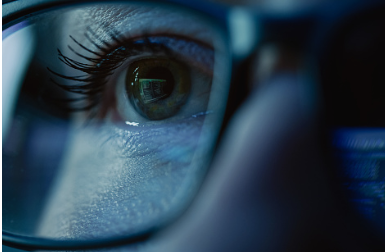 






#### For dataset <a href="https://drive.google.com/drive/folders/11MajaKB5T0cHRx5aXo9F72Un7hHqTCpA" title="Glasses dataset">   Click here</a>


**Outcomes of the Project**
- There are two diffrent classes in the dataset, Try to display the images of each class.
- Use CNN for model building.
- Explain the parameters in CNN and how it will alter the model building.
- Draw inference on Image augmentation.
- Draw inference on epochs and batch sizes.
- CNN model should be able to classify the people with and without glasses.

# Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
import glob
from PIL import Image
import matplotlib.image as mpimg
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from keras import backend as K
import os 
import random
import shutil

import warnings
warnings.filterwarnings("ignore")

# Loading Images
## a) People with Glasses 

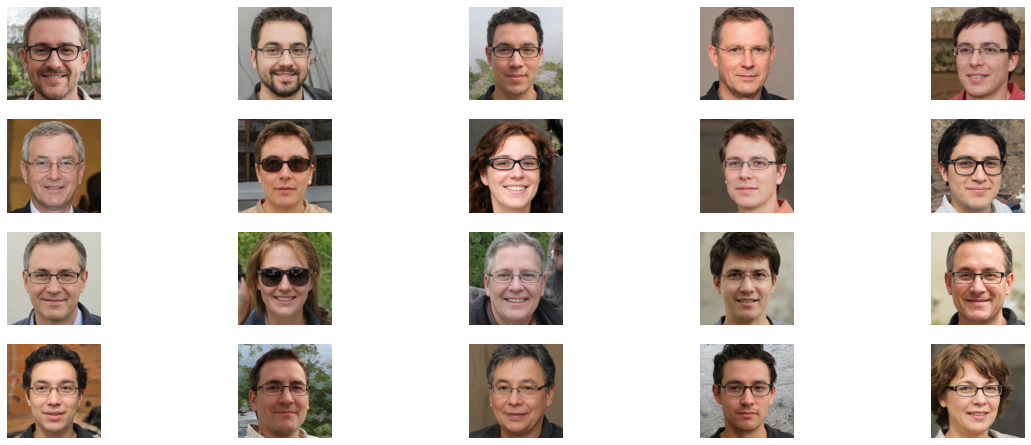

In [2]:
images1 = []                    # creating a empty list to store images 

for img_path in glob.glob( r'C:\Users\acer\Desktop\DS\Deep Learning\Assignment\Glasses\train\glasses\*'):
    images1.append(mpimg.imread(img_path))

images = images1[:20]           # printing only 20 images 

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis('off')
    #fig.tight_layout()
    plt.imshow(image)

- We have here people who wear glasses.

## b) People without Glasses

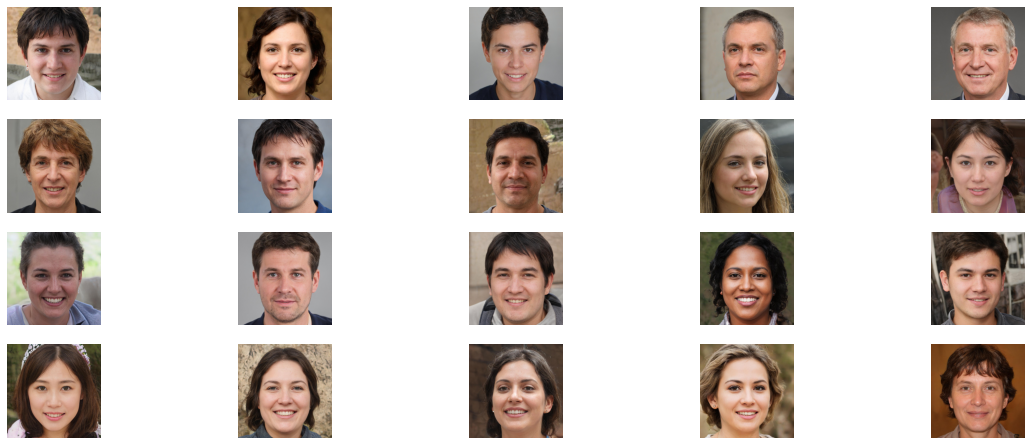

In [3]:
 # creating a empty list to store images 
images2 = []

for img_path in glob.glob( r'C:\Users\acer\Desktop\DS\Deep Learning\Assignment\Glasses\train\no_glasses\*'):
    images2.append(mpimg.imread(img_path))
    

images = images2[:20]

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis('off')
    #fig.tight_layout()
    plt.imshow(image)

---
# Data Augmentation

- Since, we have less amount of data images we may not be able to create a strong model.
- Hence to increase the dataset we will apply data augmentation with the help imagedatagenerator.
- It not only increases the data but also creates different variations of the orginal image which will help us train the model efficiently.
- On top of that we also need to scale the data and ImageDataGenerator takes care of that too.

In [11]:
#we can augment the images with the help og imagedatagenerator
#it reduces the storage issues and computational time as well

batch_size = 16

train_datagen = ImageDataGenerator(
rescale=1. / 255,                                      # rescale will transform the data values between 0 and 1
shear_range=0.2,                                      
zoom_range=0.2,
horizontal_flip=True)                                  # flips the image horizontally

train_generator = train_datagen.flow_from_directory(
        r'C:\Users\acer\Desktop\DS\Deep Learning\Assignment\Glasses\train',   # this is the input directory
        target_size=(150, 150),                  # all images will be resized to 150*150
        batch_size=batch_size,
        class_mode='binary')                     # since we use binary_crossentropy loss, we need binary labels


Found 83 images belonging to 2 classes.


---
# Model Building

In [12]:
# Initialising the CNN
model = Sequential()

#layers
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
#The main reason why we use sigmoid function is because it exists between (0 to 1).
#Therefore, it is especially used for models where we have 2 classes.

In [13]:
# Compiling the CNN
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# printng the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 16)      

In [14]:
logdir='logs'
from keras import callbacks
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

---
# Training the model

In [15]:
hist = model.fit_generator(
        train_generator,
        #steps_per_epoch = 200 // batch_size,    #The 2 slashes division return rounded integer
        epochs=50,
        callbacks=[tensorboard_callback])

Epoch 1/50
6/6 [==============================] - 6s 729ms/step - loss: 0.6646 - accuracy: 0.6506
Epoch 2/50
6/6 [==============================] - 5s 734ms/step - loss: 0.6126 - accuracy: 0.6988
Epoch 3/50
6/6 [==============================] - 5s 730ms/step - loss: 0.6301 - accuracy: 0.6988
Epoch 4/50
6/6 [==============================] - 5s 869ms/step - loss: 0.5846 - accuracy: 0.6988
Epoch 5/50
6/6 [==============================] - 5s 779ms/step - loss: 0.5408 - accuracy: 0.6988
Epoch 6/50
6/6 [==============================] - 5s 714ms/step - loss: 0.5194 - accuracy: 0.6988
Epoch 7/50
6/6 [==============================] - 5s 817ms/step - loss: 0.4486 - accuracy: 0.7831
Epoch 8/50
6/6 [==============================] - 5s 735ms/step - loss: 0.3758 - accuracy: 0.8554
Epoch 9/50
6/6 [==============================] - 5s 720ms/step - loss: 0.2831 - accuracy: 0.8554
Epoch 10/50
6/6 [==============================] - 5s 807ms/step - loss: 0.2003 - accuracy: 0.9157
Epoch 11/50
6/6 [==

# Train Accuracy

In [16]:
# calculating the mean accuracies using numpy 
train_accuracy = np.mean(hist.history['accuracy'])
print("\n%s: %.2f%%" % ('train_accuracy', train_accuracy*100))


train_accuracy: 93.95%


- We can note that the train accuracy is quite decent.

---
# Saving our model

In [17]:
from keras.models import load_model
model.save('Glasses.h5')              # saving our model with the .h5 extention so that we can use it again

---
# Testing
## Importing Libraries to load model

In [38]:
import warnings
#Importing colors to perform text editing
from simple_colors import *
# importing load_model to load the pre-trained model
from keras.models import load_model
#used for loading image

#Used for image processing
from keras.applications.vgg16 import preprocess_input
#Gives you overview of the classes
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
#importing numpy for array operations
import numpy as np
import sys
import time
#providing dimensions of the image
img_width, img_height = 150,150


In [ ]:
import warnings

# using load_model to load our model 
model = load_model("Glasses.h5", compile=False)

- We have loaded our saved model.
- Now in order to test it we have to load an image that we have already saved in the test folder.
- To ensure we have a good model, we will test it with 2 images 1 from each class.

## Testing for 'No glasses' image

In [57]:
# loading an image from no glasses class for testing
image = load_img(r'C:\Users\acer\Desktop\DS\Deep Learning\Assignment\Glasses\test\no_glasses\face-4709.jpg', target_size=(150,150))

img = np.array(image)                # converting it into an array

img = img / 255.0                    # rescaling so that the model could read it

img = img.reshape(1,150,150,3)       # reshaping it to the train images shape

1/1 [==============================] - 0s 155ms/step
Hey!,hope you'r doing good, this is built by Sachin, this model has detected your class.

Hey this is glasses detective model and i found your score to be : 0.9999988

No glasses detected

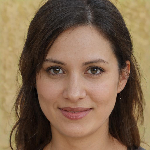

In [58]:
label = model.predict(img)
def delay_print(s):
    for c in s:
        sys.stdout.write(c)
        sys.stdout.flush()
        time.sleep(0.001)

delay_print(blue("Hey!,hope you'r doing good, this is built by Sachin, this model has detected your class."))

if label[0][0] < 0.5:
    print('\n\nHey this is glasses detective model and i found your score is:',label[0][0])
    delay_print(green("\nGlasses detected "))
else:
    print('\n\nHey this is glasses detective model and i found your score to be :',label[0][0])
    delay_print(red("\nNo glasses detected"))
image

- **We can see that our model has predicted the results correctly.**
- **We had an image from the 'no glasses' class and our model predicted it correctly.**

## Testing for 'glasses' image

In [59]:
# loading an image from glasses class for testing
image = load_img(r'C:\Users\acer\Desktop\DS\Deep Learning\Assignment\Glasses\test\glasses\face-4270.jpg', target_size=(150,150))

img1 = np.array(image)             # converting it into an array

img1 = img1 / 255.0                # rescaling so that the model could read it

img1 = img1.reshape(1,150,150,3)   # reshaping it to the train images shape

1/1 [==============================] - 0s 101ms/step
Hey!,hope you'r doing good, this is built by Sachin, this model has detected your class.

Hey this is glasses detective model and i found your score is: 5.292248e-14

Glasses detected 

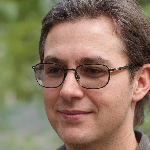

In [60]:
label = model.predict(img1)
def delay_print(s):
    for c in s:
        sys.stdout.write(c)
        sys.stdout.flush()
        time.sleep(0.001)

delay_print(blue("Hey!,hope you'r doing good, this is built by Sachin, this model has detected your class."))

if label[0][0] < 0.5:
    print('\n\nHey this is glasses detective model and i found your score is:',label[0][0])
    delay_print(green("\nGlasses detected "))
else:
    print('\n\nHey this is glasses detective model and i found your score to be :',label[0][0])
    delay_print(red("\nNo glasses detected"))
image

- **We can see that our model has predicted the results correctly.**
- **We had an image from the 'glasses' class and our model predicted it correctly.**

---
# Conclusion

- We had a dataset contaning 2 classes i.e. glasses and no glasses. Each containing images.
- We applied CNN to classify the image data as it offers various functionalities to deal with image data.
- Since the data was not much, we did image augmentation using ImageDataGenerator.
- We generated data using the image generator and fed the results directly to our model.
- After that we trained our model with a good accuracy and saved it for further use.
- At last tested it with the test data and our model could classify them correctly.